<a href="https://colab.research.google.com/github/shravankumargulvadi/Assignment-5/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
1.Change the code 8 or your own 4th Code from Assignment 4 to include:

  1.image normalization:DONE
  
  2.L2 regularization:DONE
  
  3.ReLU after BN:DONE
  
2.Run your new code for 40 epochs and save the model with highest validation accuracy:DONE
3.Find out 25 misclassified images from the validation dataset and create an image gallery:DONE

Observation: The Max test accuracy instead of improving declined marginally from 99.47 to 97.99. To ascertain the reason behind this, the above changes were carried out individually in isolation and its effects on validation accuracy was monitored. It was found that the addition of L2 regularization had the greatest effect in bringing down the validation accuracy.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing all the required Modules from keras

##Dropout-randomly drops specified proportion of kernels/neurons-helps in overcoming overfitting.
All other modules same as in previous assignment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

## Seeding for Repeatability

In [0]:
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

## Splitting the data for training and testing

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Printing Size of the image in MNIST and a sample image

(60000, 28, 28)


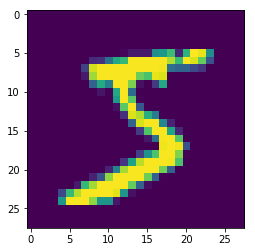

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the MNIST images to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Setting the 'type' to float32 (Decimel) and Normalizing the pixels by deviding it by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Converting the target values to 1 hot encoding

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Normalizing Training and Test Data

In [0]:
for i in range(60000):
 mean=np.mean(X_train[i], axis=0)
 sd=np.std(X_train[i])
 X_train[i]= (X_train[i]-mean)/sd

In [0]:
for i in range(10000):
 mean=np.mean(X_test[i], axis=0)
 sd=np.std(X_test[i])
 X_test[i]= (X_test[i]-mean)/sd

(60000, 28, 28, 1)


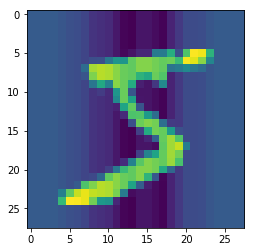

In [13]:

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0].reshape(28,28))

## Building the main model

In [14]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1), kernel_regularizer= keras.regularizers.l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, 1, kernel_regularizer= keras.regularizers.l2(0.01))) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(18, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))



model.add(Convolution2D(20, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))



model.add(Convolution2D(10, 4, 4))  #1


model.add(Flatten())
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarni

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

## Configuring the model for training
1.Loss- Is a measure of error and is the function which is to be minimized by the optimizer

2.Optimizer- optimizes the result by updating the weights in accordance with the loss

3. Metrics-A metric is a function that is used to judge the performance of the model

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


## Creating Checkpoints to save the best weights

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Model training begins on training data witha each batch containing 32 images and no of epochs is 50

In [18]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 26s 435us/step - loss: 0.4122 - acc: 0.9384 - val_loss: 0.4616 - val_acc: 0.8934

Epoch 00001: val_acc improved from -inf to 0.89340, saving model to weights.best.hdf5
Epoch 2/40
60000/60000 [==============================] - 24s 393us/step - loss: 0.2566 - acc: 0.9616 - val_loss: 0.2174 - val_acc: 0.9690

Epoch 00002: val_acc improved from 0.89340 to 0.96900, saving model to weights.best.hdf5
Epoch 3/40
60000/60000 [==============================] - 23s 378us/step - loss: 0.2379 - acc: 0.9641 - val_loss: 0.2800 - val_acc: 0.9454

Epoch 00003: val_acc did not improve from 0.96900
Epoch 4/40
60000/60000 [==============================] - 22s 372us/step - loss: 0.2278 - acc: 0.9635 - val_loss: 0.2104 - val_acc: 0.9712

Epoch 00004: val_acc improved from 0.96900 to 0.97120, saving model to weights.best.hdf5
Epoch 5/40
60000/60000 [==============================] - 22s 375us/step - l

# Reloading the weights corresponding to the highest Validation accuracy and running it on the test data

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
for i in range(10000):
 mean=np.mean(X_test[i], axis=0)
 sd=np.std(X_test[i])
 X_test[i]= (X_test[i]-mean)/sd

In [95]:
 from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1), kernel_regularizer= keras.regularizers.l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(10, 1, 1, kernel_regularizer= keras.regularizers.l2(0.01))) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(18, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))



model.add(Convolution2D(20, 3, 3, kernel_regularizer= keras.regularizers.l2(0.01)))#4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))



model.add(Convolution2D(10, 4, 4))  #1


model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/loc

In [0]:
model.load_weights("weights.best.hdf5")

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Evaluate and Print score

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [99]:
print(score)

[0.15552259485721587, 0.9799]


# Max Accuracy=97.99       
## has come down from 99.47% attained in the previous assignment

# Accumulating the serial nos of missclassified images

In [105]:
miscls=[]
for i in range(10000):
 predicted = model.predict(X_test[i].reshape(1, 28, 28, 1))
 Y_test[i]=Y_test[i].reshape(1, 10)
 Y=np.argmax(Y_test[i])
 predicted=np.argmax(predicted, axis=1)
 if predicted!=Y:
  miscls.append(i)
print(miscls)
len(miscls)

[8, 158, 241, 247, 259, 321, 338, 391, 409, 412, 445, 479, 543, 625, 712, 716, 740, 881, 883, 900, 947, 956, 965, 1014, 1044, 1107, 1178, 1202, 1226, 1232, 1247, 1248, 1273, 1281, 1290, 1299, 1319, 1364, 1377, 1429, 1469, 1500, 1527, 1530, 1553, 1559, 1581, 1621, 1634, 1673, 1686, 1709, 1717, 1754, 1790, 1813, 1878, 1901, 1909, 1952, 2018, 2035, 2053, 2070, 2107, 2109, 2118, 2130, 2135, 2174, 2182, 2266, 2272, 2276, 2293, 2325, 2447, 2462, 2473, 2573, 2574, 2597, 2607, 2654, 2810, 2836, 2847, 2896, 2939, 2953, 2995, 3060, 3062, 3073, 3115, 3225, 3240, 3289, 3303, 3316, 3422, 3437, 3490, 3520, 3558, 3559, 3597, 3681, 3716, 3726, 3727, 3730, 3757, 3767, 3778, 3808, 3821, 3853, 3856, 3906, 3926, 3941, 3985, 4007, 4075, 4176, 4194, 4201, 4224, 4238, 4256, 4284, 4294, 4359, 4382, 4393, 4505, 4571, 4639, 4690, 4724, 4740, 4783, 4807, 4814, 4823, 4860, 4890, 4978, 5152, 5159, 5203, 5634, 5842, 5887, 5888, 5937, 6028, 6065, 6505, 6555, 6571, 6572, 6576, 6597, 6617, 6625, 6651, 6847, 6945, 7054

201

# Printing the Gallery of misclassified images 

IndexError: ignored

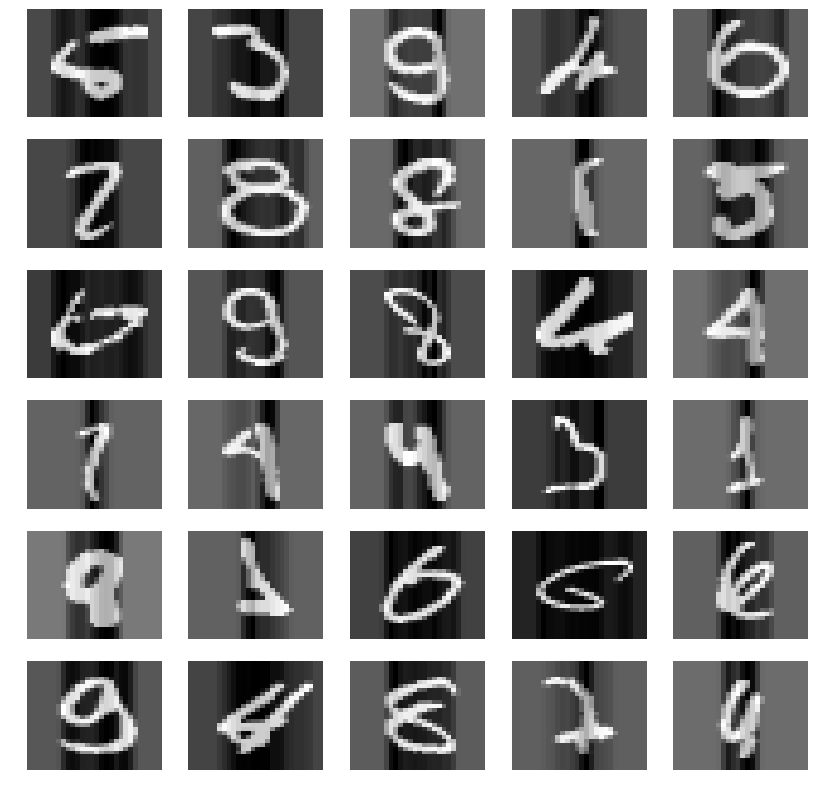

In [111]:
fig, axes= plt.subplots(nrows=6, ncols=5, figsize=(14, 14))
images=[img.reshape(28, 28) for index, img in enumerate(X_test) if index in miscls]
for idx, image in enumerate(images):
  row= idx // 5
  col= idx % 5
  axes[row, col].axis("off")
  axes[row, col].imshow(image, cmap="gray", aspect="auto")
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.show()